In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from joblib import load, dump

# Polynomial Regression

* Used when two variables aren't necessarily related by a straight line, but rather share an exponential relationship, i.e the points do not follow the pattern of a straight line, but a curve.
* Or, when two variables make sense when strongly related to each other, wherein taking their product along with the individual terms would be more meaningful.
* Upon transforming X, we get the individual variables, the product of pairs, and the squares of the individual terms, along with the Y-intercept.
  * Example: If X consists of A and B, we get C (Y-intercept), A, B, A^2, B^2, and AB.


In [2]:
df = pd.read_csv('~/Documents/Data Science Masterclass/DATA/Advertising.csv')
X = df.drop('sales', axis=1)
y = df['sales']

In [3]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)
# Degree=2 --> A^2 and B^2
#include_bias=False --> Y-intercept is equal to 0

In [4]:
poly_features = polynomial_converter.fit_transform(X)

In [5]:
poly_features.shape

(200, 9)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, 
    test_size=0.3, random_state=101)

In [7]:
model = LinearRegression()

In [8]:
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_hat = model.predict(X_test)

In [10]:
RMSE = np.sqrt(mean_squared_error(y_test, y_hat))
RMSE

0.6646431757269268

In [11]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

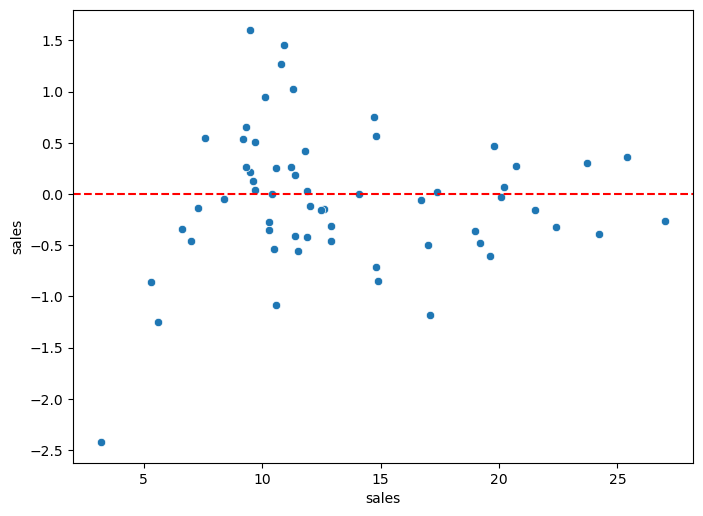

In [12]:
test_residuals = y_test - y_hat

# Plotting errors
plt.figure(figsize=(8, 6), dpi=100)
sbn.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--')